In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = 'drive/MyDrive/204456-stars-classification/'

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier 
import pandas as pd

In [ ]:
train = pd.read_csv(path+'train_features.csv')
train = train.drop(columns='objectID')
labels = pd.read_csv(path+'train_labels.csv')
labels = labels.drop(columns='objectID')
test = pd.read_csv(path+'test_features.csv')
test = test.drop(columns='objectID')
train

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13,feature 14,feature 15,feature 16,feature 17,feature 18,feature 19,feature 20,feature 21,feature 22,feature 23,feature 24,feature 25,feature 26,feature 27,feature 28,feature 29,feature 30,feature 31,feature 32,feature 33,feature 34,feature 35,feature 36,feature 37,feature 38,feature 39,feature 40,...,feature 411,feature 412,feature 413,feature 414,feature 415,feature 416,feature 417,feature 418,feature 419,feature 420,feature 421,feature 422,feature 423,feature 424,feature 425,feature 426,feature 427,feature 428,feature 429,feature 430,feature 431,feature 432,feature 433,feature 434,feature 435,feature 436,feature 437,feature 438,feature 439,feature 440,feature 441,feature 442,feature 443,feature 444,feature 445,feature 446,feature 447,feature 448,feature 449,feature 450
0,0.291047,0.943790,0.000000,0.533179,0.0,0,0.000000,0.744756,0,0.005658,0,0.006837,0.000000,0.0,0,0.000000,0,0.0,0,0,0,1.688306,0.223177,0.0,0.000000,0.000000,0.000000,1.487947,0.561656,0.208540,1.591610,0.0,2.306405,2.265675,0.163211,0.000000,0,0.290464,0.000000,0.431356,...,0.112730,0.754205,0.775556,0.0,0.000000,0.000000,0,0.566043,1.025448,0,0.359782,0.000000,0.307389,0.058420,0.665141,0.000000,1.113524,0.0,2.016016,0.165977,0.000000,0,0.000000,0.677455,0.0,0.000000,0.000000,0.993930,0.639515,0.077250,0.000000,0,0.407168,0.000000,0.065170,0,0.000000,0.795298,0.718749,1.251721
1,0.369374,1.474749,0.000000,1.462594,0.0,0,0.000000,0.900130,0,0.000000,0,0.142551,0.000000,0.0,0,0.000000,0,0.0,0,0,0,1.052321,0.532550,0.0,0.462672,0.028730,0.000000,1.705313,0.799221,0.764344,2.278368,0.0,2.247967,2.451664,0.100648,0.308435,0,0.273321,0.033627,0.000000,...,0.046111,0.509510,0.448116,0.0,0.110761,0.000000,0,0.481377,0.288465,0,0.701921,0.348558,0.259284,0.433545,0.711373,0.073918,1.485806,0.0,3.021380,0.645383,0.052761,0,0.000000,0.467310,0.0,0.247033,0.324986,1.466532,0.193084,0.000000,0.000000,0,0.725514,0.285169,0.606921,0,0.000000,0.998699,0.673542,0.522565
2,0.333436,0.793812,0.000000,0.592919,0.0,0,0.000000,0.810013,0,0.000000,0,0.110222,0.000000,0.0,0,0.025031,0,0.0,0,0,0,1.472372,0.233888,0.0,0.000000,0.000000,0.054475,1.924331,0.750618,0.286193,1.822692,0.0,2.589467,2.411564,0.000000,0.067156,0,0.271447,0.000000,0.609931,...,0.127241,0.957826,0.541059,0.0,0.259503,0.000000,0,0.134861,0.776937,0,0.341685,0.091381,0.520579,0.000000,0.526467,0.000000,1.436472,0.0,2.383970,0.706758,0.000000,0,0.000000,0.507981,0.0,0.000000,0.061290,1.335155,0.541849,0.000000,0.000000,0,0.378099,0.203892,0.371877,0,0.000000,0.589929,0.887829,1.114233
3,0.365310,0.611141,0.000000,0.723450,0.0,0,0.000000,0.837954,0,0.000000,0,0.004371,0.000000,0.0,0,0.005497,0,0.0,0,0,0,1.053077,0.171616,0.0,0.000000,0.000000,0.000000,1.650831,0.595423,0.030997,1.676479,0.0,2.369949,2.038656,0.167452,0.128313,0,0.449406,0.000000,0.474957,...,0.339289,0.703786,0.396067,0.0,0.190951,0.000000,0,0.250280,0.548191,0,0.438659,0.000000,0.046022,0.267854,0.446353,0.000000,1.400382,0.0,2.017464,0.289705,0.000000,0,0.000000,0.363169,0.0,0.000000,0.014784,1.167482,0.461607,0.000000,0.000000,0,0.303730,0.000000,0.419165,0,0.000000,0.572178,0.790265,0.907790
4,0.417787,1.558615,0.140148,2.311888,0.0,0,0.195059,0.000000,0,0.000000,0,0.000000,0.879168,0.0,0,0.000000,0,0.0,0,0,0,0.773421,1.778837,0.0,0.596676,1.115996,0.205111,1.110670,0.900277,1.333056,2.358401,0.0,2.384425,1.847744,0.000000,0.624098,0,0.761935,0.641748,0.000000,...,0.556717,0.302304,0.000000,0.0,0.205174,0.339438,0,0.597599,0.000000,0,0.905361,1.183256,0.246751,1.062857,0.343006,1.021164,1.553620,0.0,2.899420,0.121804,0.203251,0,0.000000,0.423573,0.0,0.733091,0.555625,1.614990,0.000000,0.198463,0.000000,0,0.974498,0.000000,0.557228,0,0.196458,0.535646,0.859190,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

instantly prediction 

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train, labels, test_size=0.4, random_state=42)

In [ ]:
classifier = RandomForestClassifier()
classifier.fit(X_train,y_train)

preds = classifier.predict(X_valid) 
accuracy_score(preds,y_valid) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.6781115879828327

with normalization

In [ ]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
X_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

classifier = RandomForestClassifier()
classifier.fit(X_scaled,y_train)

preds = classifier.predict(X_valid_scaled) 
accuracy_score(preds,y_valid) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7081545064377682

with normalization and SMOTE

In [ ]:
# in this dataset has class imbalance problem
labels_list = labels.classLabel.tolist()
for i in range(labels.classLabel.max()+1):
  print('class %d:'%i,labels_list.count(i))

class 0: 29
class 1: 67
class 2: 62
class 3: 58
class 4: 17
class 5: 172
class 6: 36
class 7: 19
class 8: 72
class 9: 17
class 10: 17
class 11: 16


In [ ]:
from imblearn.over_sampling import SMOTE

scaler = preprocessing.StandardScaler().fit(train)
X_scaled = scaler.transform(train)

sm = SMOTE(random_state=69)
X_res, y_res = sm.fit_resample(X_scaled, labels)

clf = RandomForestClassifier()
clf.fit(X_res, y_res)

X_valid_scaled = scaler.transform(X_valid)

predict_valid  = clf.predict(X_valid_scaled)
accuracy_score(predict_valid,y_valid)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


1.0

The result is really good but the actual result in Kaggle is 0.85 (the fifth attempt, I tried with feature selection(featurewiz))

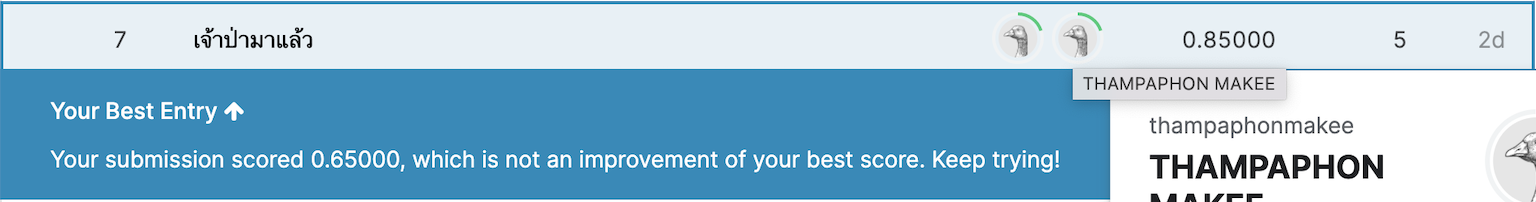

In [ ]:
scaler = preprocessing.StandardScaler().fit(train)
X_scaled = scaler.transform(train)

sm = SMOTE(random_state=69)
X_res, y_res = sm.fit_resample(X_scaled, labels)

In [ ]:
X_valid_scaled = scaler.transform(test)
predict_valid = clf.predict(X_valid_scaled)

In [ ]:
submission_template = pd.read_csv('submission_template.csv')
submission_template['predictedLabel'] = predict_valid
submission_template.to_csv('submission.csv', index=False)